In [6]:
from annoy import AnnoyIndex
import pandas as pd
import numpy as np
import cv2
import sys  
sys.path.insert(0, '../')
import matplotlib.pyplot as plt
from bot.utils.color_extractor import ColorFeaturesExtractor, Mode
from bot.utils.BOVW_extractor import BOVWFeaturesExtractor
from bot.utils.hog_extractor import HogFeaturesExtractor
from bot.utils.retriever import Retriever
from bot.utils.utils import get_names_from_indexes
import tensorflow as tf
from skimage.io import imread
import pickle
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Create indexes

In [2]:
def create_index(features_path, index_dir_path, retrieval_mode, metric):
    # read features
    df_features = pd.read_csv(features_path, sep=',', header=None)
    # instantiate retriever
    retriever = Retriever(index_dir_path)
    # create index
    retriever.create_index(df_features, retrieval_mode=retrieval_mode, metric = metric)
#     return df_features

In [3]:
# # neural network efficientnet features
create_index('../data/nn_features.csv', '../indexes/', 'neural_network', 'angular')

In [4]:
# neural network efficientnet features pc
create_index('../data/nn_features_pca.csv', '../indexes/', 'neural_network_pca', 'angular')

In [3]:
# # neural network resnet features
create_index('../data/nn_resnet_features.csv', '../indexes/', 'neural_network_resnet', 'angular')

In [4]:
# neural network resnet features pc
create_index('../data/nn_resnet_features_pca.csv', '../indexes/', 'neural_network_resnet_pca', 'angular')

In [5]:
# # color features
create_index('../data/color_features.csv', '../indexes/', 'color', 'euclidean')

In [6]:
# color features pca
create_index('../data/color_features_pca.csv', '../indexes/', 'color_pca', 'euclidean')

In [7]:
# # color features center subregions
create_index('../data/color_features_center_subregions.csv', '../indexes/', 'color_center_subregions', 'euclidean')

In [8]:
# color features center subregions pca
create_index('../data/color_features_center_subregions_pca.csv', '../indexes/', 'color_center_subregions_pca', 'euclidean')

In [9]:
# # BOVW features
# create_index('../data/BOVW_features.csv', '../indexes/', 'bovw', 'angular')

In [10]:
# # BOVW features pca
# create_index('../data/BOVW_features_pca.csv', '../indexes/', 'bovw_pca', 'angular')

In [11]:
# # HOG features
create_index('../data/hog_features.csv', '../indexes/', 'hog', 'euclidean')

In [12]:
# HOG features pca
create_index('../data/hog_features_pca.csv', '../indexes/', 'hog_pca', 'euclidean')

In [13]:
# # color + HOG features
# create_index('../data/merged_color_hog_features.csv', '../indexes/', 'color_hog', 'angular')

In [14]:
# color + HOG features with pca
create_index('../data/hog_color_features_pca.csv', '../indexes/', 'hog_color_pca', 'euclidean')

In [15]:
# # color + HOG features with pca and standardization
# create_index('../data/merged_color_hog_pca_std.csv', '../indexes/', 'color_hog_pca_std', 'angular')

# Test retrieval

In [7]:
# utils
def show_images(idx, names_df, img_path):
    # plot starting image
    img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=(2, 2))
    ax.imshow(img_rgb)
    plt.show()
    # extract names
    names = names_df.loc[idx,'name'].values
    # prepare plot
    n_elements = len(names)
    fig, ax = plt.subplots(1,n_elements,figsize=(12,6))
    for i in range(0,n_elements):
        tmp = cv2.imread('../data/train/' + names[i])
        tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
        ax[i].imshow(tmp)
    plt.show()
    return names

# efficientnet
def loadimg(img_path):

    im = tf.keras.preprocessing.image.load_img(
        img_path,
        target_size=(300, 300, 3)
    )
    imarr = tf.keras.preprocessing.image.img_to_array(im)
    imarr = tf.keras.applications.efficientnet.preprocess_input(imarr)
    return np.array([imarr])

# resnet
def preprocess_img(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    return img_data


In [249]:
# instantiate retriever
retriever = Retriever('../indexes/', load_all=True)
# choose image
img_path = '../test_imgs/bg_wild_4.jpg'
# settings
n_neighbours = 10

loading neural_network ...
loading neural_network_pca ...
loading color ...
loading color_pca ...
loading color_center_subregions ...
loading color_center_subregions_pca ...
loading hog ...
loading hog_pca ...
loading hog_color_pca ...
loading neural_network_resnet ...
loading neural_network_resnet_pca ...


## Neural network resnet

In [250]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [251]:
# read model
model = ResNet50(weights='imagenet', include_top=False, pooling='max')

In [252]:
# NN
img_features_nn = model.predict(loadimg(img_path))[0]

In [253]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_nn, retrieval_mode='neural_network_resnet', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [254]:
distances

[0.5876741409301758,
 0.6481211185455322,
 0.7051530480384827,
 0.7061523199081421,
 0.7115108370780945,
 0.718675971031189,
 0.7272247076034546,
 0.7303881049156189,
 0.7357425689697266,
 0.7377533912658691]

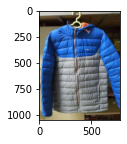

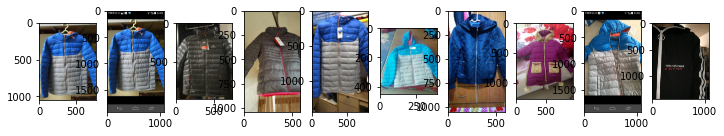

array(['3981.jpg', '3983.jpg', '4008.jpg', '6760.jpg', '3980.jpg',
       '3986.jpg', '1392.jpg', '5330.jpg', '3985.jpg', '866.jpg'],
      dtype=object)

In [255]:
# show retrieval results
show_images(indexes, df_names, img_path)


## Neural network resnet PCA

In [256]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [257]:
# read model
model = ResNet50(weights='imagenet', include_top=False, pooling='max')

In [258]:
# NN
img_features_nn = model.predict(loadimg(img_path))[0]
# read pca model
with open('../data/pca_nn_resnet.pckl', 'rb') as handle:
                    pca_nn = pickle.load(handle)
# apply pca
img_features_nn_pca = pca_nn.transform([img_features_nn])[0]

In [259]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_nn_pca, retrieval_mode='neural_network_resnet_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [260]:
distances

[0.7635775208473206,
 0.8667671084403992,
 0.9462006092071533,
 0.9777352809906006,
 1.0050333738327026,
 1.01361882686615,
 1.0254366397857666,
 1.0282073020935059,
 1.0419572591781616,
 1.046405553817749]

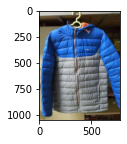

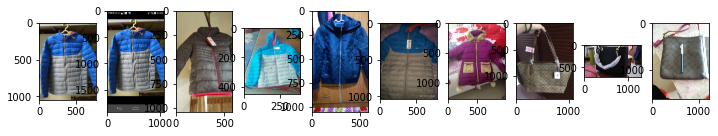

array(['3981.jpg', '3983.jpg', '6760.jpg', '3986.jpg', '1392.jpg',
       '3982.jpg', '5330.jpg', '32930.jpg', '38167.jpg', '39075.jpg'],
      dtype=object)

In [261]:
# show retrieval results
show_images(indexes, df_names, img_path)


## Neural network efficientnet

In [262]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [263]:
# read model
model = tf.keras.models.load_model('../data/model.h5')

In [264]:
# NN
img_features_nn = model.predict(loadimg(img_path))[1][0]

In [265]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_nn, retrieval_mode='neural_network', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [266]:
distances

[0.010267039760947227,
 0.385991632938385,
 0.743965208530426,
 0.7567304372787476,
 0.773502767086029,
 0.7749605178833008,
 0.7811681032180786,
 0.7841404676437378,
 0.7898295521736145,
 0.8000286221504211]

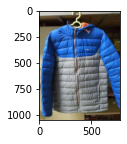

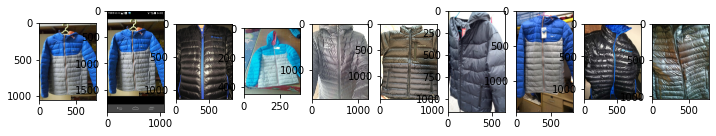

array(['3981.jpg', '3983.jpg', '5129.jpg', '3986.jpg', '1856.jpg',
       '4504.jpg', '4339.jpg', '3980.jpg', '5131.jpg', '1841.jpg'],
      dtype=object)

In [267]:
# show retrieval results
show_images(indexes, df_names, img_path)


## Neural network efficientnet PCA

In [268]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [269]:
# read model
model = tf.keras.models.load_model('../data/model.h5')

In [270]:
# NN
img_features_nn = model.predict(loadimg(img_path))[1][0]
# read pca model
with open('../data/pca_nn.pckl', 'rb') as handle:
                    pca_nn = pickle.load(handle)
# apply pca
img_features_nn_pca = pca_nn.transform([img_features_nn])[0]

In [271]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_nn_pca, retrieval_mode='neural_network_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [272]:
distances

[0.008194156922399998,
 0.3558332920074463,
 0.5116592049598694,
 0.5488278269767761,
 0.5751939415931702,
 0.5855029821395874,
 0.5921671986579895,
 0.5999447703361511,
 0.6150649189949036,
 0.6195254325866699]

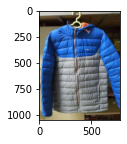

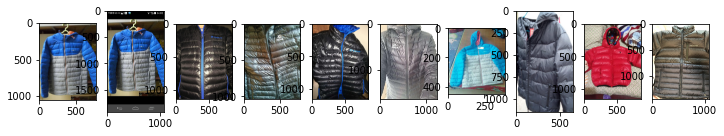

array(['3981.jpg', '3983.jpg', '5129.jpg', '1841.jpg', '5131.jpg',
       '1856.jpg', '3986.jpg', '4339.jpg', '3066.jpg', '4504.jpg'],
      dtype=object)

In [273]:
# show retrieval results
show_images(indexes, df_names, img_path)


## Color

In [274]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [275]:
# color extractor
features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
img_features_color = features_extractor.extract(cv2.imread(img_path), Mode.CENTER_ONLY)

In [276]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_color, retrieval_mode='color', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [277]:
distances

[0.0,
 0.19800950586795807,
 0.6198490262031555,
 0.6512519121170044,
 0.7054415941238403,
 0.7058222889900208,
 0.7100957036018372,
 0.7178382873535156,
 0.7191908955574036,
 0.7195426225662231]

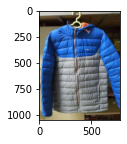

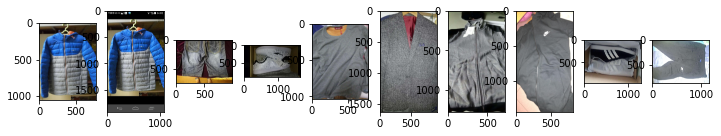

array(['3981.jpg', '3983.jpg', '12612.jpg', '17583.jpg', '4056.jpg',
       '1515.jpg', '1475.jpg', '117.jpg', '18432.jpg', '7054.jpg'],
      dtype=object)

In [278]:
# show retrieval results
show_images(indexes, df_names, img_path)

## Color PCA

In [279]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [280]:
# color extractor
features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
img_features_color = features_extractor.extract(cv2.imread(img_path), Mode.CENTER_ONLY)
# read pca model
with open('../data/pca_color.pckl', 'rb') as handle:
                    pca_color = pickle.load(handle)
# apply pca
img_features_color_pca = pca_color.transform([img_features_color])[0]

In [281]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_color_pca, retrieval_mode='color_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [282]:
distances

[0.0,
 0.16720552742481232,
 0.416116863489151,
 0.45106223225593567,
 0.4557574391365051,
 0.4955736994743347,
 0.4958205223083496,
 0.49945199489593506,
 0.5001616477966309,
 0.5045335292816162]

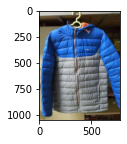

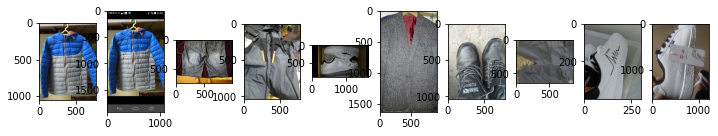

array(['3981.jpg', '3983.jpg', '12612.jpg', '5249.jpg', '17583.jpg',
       '1515.jpg', '24428.jpg', '12113.jpg', '18821.jpg', '22211.jpg'],
      dtype=object)

In [283]:
# show retrieval results
show_images(indexes, df_names, img_path)

## Color center subregions

In [284]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [285]:
# color extractor
features_extractor = ColorFeaturesExtractor((16, 18, 2), 0.6)
img_features_color = features_extractor.extract(cv2.imread(img_path), Mode.CENTER_SUBREGIONS)

In [286]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_color, retrieval_mode='color_center_subregions', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [287]:
distances

[0.0,
 1.135313868522644,
 1.9013562202453613,
 1.911630630493164,
 1.9282578229904175,
 1.9330426454544067,
 1.9349201917648315,
 1.951945424079895,
 1.9660874605178833,
 1.982728123664856]

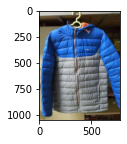

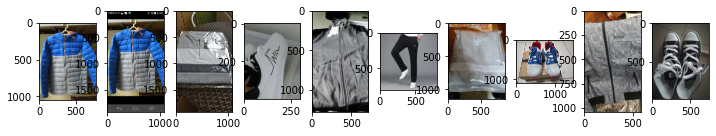

array(['3981.jpg', '3983.jpg', '5015.jpg', '18821.jpg', '1475.jpg',
       '10966.jpg', '8551.jpg', '19156.jpg', '229.jpg', '20536.jpg'],
      dtype=object)

In [288]:
# show retrieval results
show_images(indexes, df_names, img_path)

## Color center subregions PCA

In [289]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [290]:
# color extractor
features_extractor = ColorFeaturesExtractor((16, 18, 2), 0.6)
img_features_color = features_extractor.extract(cv2.imread(img_path), Mode.CENTER_SUBREGIONS)
# read pca model
with open('../data/pca_color_center_subregions.pckl', 'rb') as handle:
                    pca_color_center_subregions = pickle.load(handle)
# apply pca
img_features_color_pca = pca_color_center_subregions.transform([img_features_color])[0]

In [291]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_color_pca, retrieval_mode='color_center_subregions_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [292]:
distances

[0.0,
 0.5753351449966431,
 1.178054690361023,
 1.1916272640228271,
 1.219581961631775,
 1.2431720495224,
 1.2740315198898315,
 1.280385971069336,
 1.285392165184021,
 1.2895567417144775]

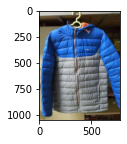

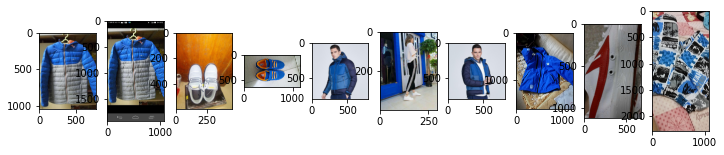

array(['3981.jpg', '3983.jpg', '18874.jpg', '17974.jpg', '5816.jpg',
       '12742.jpg', '5817.jpg', '5804.jpg', '27868.jpg', '10367.jpg'],
      dtype=object)

In [293]:
# show retrieval results
show_images(indexes, df_names, img_path)

## HOG

In [294]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [295]:
# HOG extractor
features_extractor = HogFeaturesExtractor()
img_features_hog = features_extractor.extract(imread(img_path))

In [296]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_hog, retrieval_mode='hog', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [297]:
distances

[0.0032610862981528044,
 7.54569673538208,
 7.545797824859619,
 7.567014217376709,
 7.625151634216309,
 7.705990791320801,
 7.718175411224365,
 7.7567009925842285,
 7.761762619018555,
 7.782212257385254]

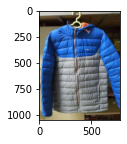

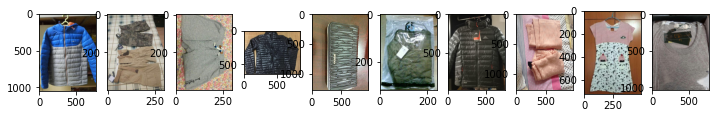

array(['3981.jpg', '11160.jpg', '13342.jpg', '6272.jpg', '31919.jpg',
       '6436.jpg', '4008.jpg', '2040.jpg', '1884.jpg', '200.jpg'],
      dtype=object)

In [298]:
# show retrieval results
show_images(indexes, df_names, img_path)

## HOG PCA

In [299]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/rpo.jpg'

In [300]:
# HOG extractor
features_extractor = HogFeaturesExtractor()
img_features_hog = features_extractor.extract(imread(img_path))
# read pca model
with open('../data/pca_hog.pckl', 'rb') as handle:
                    pca_hog = pickle.load(handle)
# apply pca
img_features_hog_pca = pca_hog.transform([img_features_hog])[0]

In [301]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_hog_pca, retrieval_mode='hog_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [302]:
distances

[0.0007492064614780247,
 4.531336307525635,
 4.632426738739014,
 4.777997016906738,
 4.804083824157715,
 4.812108516693115,
 4.817715644836426,
 4.818268299102783,
 4.826798439025879,
 4.831465721130371]

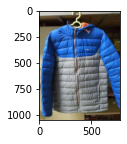

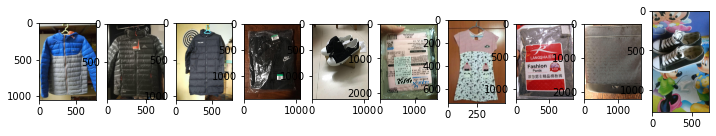

array(['3981.jpg', '4008.jpg', '3963.jpg', '115.jpg', '20589.jpg',
       '5908.jpg', '1884.jpg', '2994.jpg', '39161.jpg', '17427.jpg'],
      dtype=object)

In [303]:
# show retrieval results
show_images(indexes, df_names, img_path)

## Color + HOG pca

In [304]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/rpo.jpg'

In [305]:
# extractors
hog_features_extractor = HogFeaturesExtractor()
color_features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
# extract features
img_features_hog = hog_features_extractor.extract(imread(img_path))
img_features_color = color_features_extractor.extract(cv2.imread(img_path), Mode.CENTER_ONLY)
# read pca models
with open('../data/pca_hc_hog.pckl', 'rb') as handle:
                    pca_hc_hog = pickle.load(handle)
with open('../data/pca_hc_color.pckl', 'rb') as handle:
                    pca_hc_color = pickle.load(handle)
# apply pca
img_features_hog_pca = pca_hc_hog.transform([img_features_hog])[0]
img_features_color_pca = pca_hc_color.transform([img_features_color])[0]
# merge features
img_features_merged_pca = np.hstack([img_features_hog_pca, img_features_color_pca])

In [306]:
img_features_merged_pca.shape

(300,)

In [307]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_merged_pca, retrieval_mode='hog_color_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [308]:
distances

[0.0007711169891990721,
 4.688558101654053,
 4.752486705780029,
 4.884242534637451,
 4.884669780731201,
 4.8861870765686035,
 4.944249629974365,
 4.979864597320557,
 4.980376720428467,
 4.9839768409729]

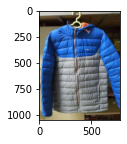

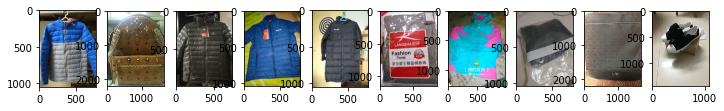

array(['3981.jpg', '32979.jpg', '4008.jpg', '5969.jpg', '3963.jpg',
       '2994.jpg', '3397.jpg', '11278.jpg', '39161.jpg', '20589.jpg'],
      dtype=object)

In [309]:
# show retrieval results
show_images(indexes, df_names, img_path)

# Test delete

In [310]:
# test delete index
retriever.delete_index('replace_value')

## Color + HOG (OLD)

In [311]:
# # read images names
# df_names = pd.read_csv('../data/retrieval_base.csv')
# # choose img
# img_path = '../test_imgs/tshirt.jpg'

In [312]:
# # extractors
# hog_features_extractor = HogFeaturesExtractor()
# color_features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
# # extract features
# img_features_hog = hog_features_extractor.extract(imread(img_path))
# img_features_color = color_features_extractor.extract(cv2.imread(img_path), center_only=True)
# # merge features
# img_features_merged = np.concatenate((img_features_hog, img_features_color))

In [313]:
# # retrieve images
# (indexes, distances) = retriever.retrieve(img_features_merged, retrieval_mode='color_hog', n_neighbours=5, include_distances=True)

In [314]:
# distances

In [315]:
# # show retrieval results
# show_images(indexes, df_names)

## Color + HOG pca and standardization (OLD)

In [316]:
# # read images names
# df_names = pd.read_csv('../data/retrieval_base.csv')
# # choose img
# img_path = '../test_imgs/rpo.jpg'
# img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
# plt.imshow(img_rgb)

In [317]:
# # extractors
# hog_features_extractor = HogFeaturesExtractor()
# color_features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
# # extract features
# img_features_hog = hog_features_extractor.extract(imread(img_path))
# img_features_color = color_features_extractor.extract(cv2.imread(img_path), center_only=True)
# # merge features
# img_features_merged = np.concatenate((img_features_hog, img_features_color))
# # read and apply scaler
# with open('../data/scaler_std.pckl', 'rb') as handle:
#                     scaler = pickle.load(handle)
# img_features_merged = scaler.transform([img_features_merged])
# # read and apply pca model
# with open('../data/pca_std.pckl', 'rb') as handle:
#                     pca = pickle.load(handle)
# # apply pca
# img_features_merged_pca = pca.transform(img_features_merged)[0]

In [318]:
# img_features_merged_pca.shape

In [319]:
# # retrieve images
# (indexes, distances) = retriever.retrieve(img_features_merged_pca, retrieval_mode='color_hog_pca_std', n_neighbours=5, include_distances=True)

In [320]:
distances

[0.0007711169891990721,
 4.688558101654053,
 4.752486705780029,
 4.884242534637451,
 4.884669780731201,
 4.8861870765686035,
 4.944249629974365,
 4.979864597320557,
 4.980376720428467,
 4.9839768409729]

In [321]:
# # show retrieval results
# show_images(indexes, df_names)

## BOVW (OLD)

In [322]:
# # read images names
# df_names = pd.read_csv('../data/retrieval_base.csv')
# # choose img
# img_path = '../test_imgs/tshirt.jpg'
# img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
# plt.imshow(img_rgb)

In [323]:
# # BOVW extractor
# features_extractor = BOVWFeaturesExtractor('../data/')
# img_features_bovw = features_extractor.extract(cv2.imread(img_path))

In [324]:
# # retrieve images
# (indexes, distances) = retriever.retrieve(img_features_bovw, retrieval_mode='bovw', n_neighbours=5, include_distances=True)

In [325]:
# distances

In [326]:
# # show retrieval results
# show_images(indexes, df_names)